In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D

In [8]:
X = np.random.random((1000, 2))*6 - 3

In [16]:
print(X.shape)
X

(1000, 2)


array([[ 0.22793036, -0.61219845],
       [-2.62623417, -0.0348375 ],
       [ 0.94363966, -0.21292513],
       ...,
       [ 2.46310829, -2.48775718],
       [ 0.49719719, -0.82786853],
       [-2.34617254,  1.44873296]])

In [12]:
y = np.cos(X[:, 0]) + np.sin(X[:, 1])

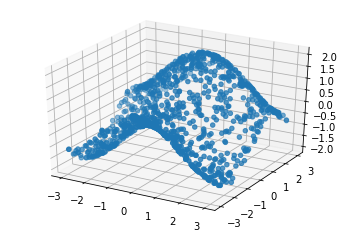

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
plt.show()

In [18]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(1))

In [28]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')

In [30]:
r = model.fit(X, y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.2761
Epoch 2/100
1000/1000 [==============================] - 1s 546us/sample - loss: 0.1207
Epoch 3/100
1000/1000 [==============================] - 1s 605us/sample - loss: 0.0652
Epoch 4/100
1000/1000 [==============================] - 1s 589us/sample - loss: 0.0282
Epoch 5/100
1000/1000 [==============================] - 1s 536us/sample - loss: 0.0132
Epoch 6/100
1000/1000 [==============================] - 0s 453us/sample - loss: 0.0100
Epoch 7/100
1000/1000 [==============================] - 0s 387us/sample - loss: 0.0075
Epoch 8/100
1000/1000 [==============================] - 0s 400us/sample - loss: 0.0075
Epoch 9/100
1000/1000 [==============================] - 1s 505us/sample - loss: 0.0074
Epoch 10/100
1000/1000 [==============================] - 0s 396us/sample - loss: 0.0053
Epoch 11/100
1000/1000 [==============================] - 1s 584us/sample - loss: 0.0048
Epoch 12/1

1000/1000 [==============================] - 0s 478us/sample - loss: 0.0059
Epoch 92/100
1000/1000 [==============================] - 0s 355us/sample - loss: 0.0039
Epoch 93/100
1000/1000 [==============================] - 0s 380us/sample - loss: 0.0015
Epoch 94/100
1000/1000 [==============================] - 0s 481us/sample - loss: 0.0011
Epoch 95/100
1000/1000 [==============================] - 0s 484us/sample - loss: 8.2583e-04
Epoch 96/100
1000/1000 [==============================] - 1s 517us/sample - loss: 5.9605e-04
Epoch 97/100
1000/1000 [==============================] - 1s 598us/sample - loss: 7.2793e-04
Epoch 98/100
1000/1000 [==============================] - 0s 389us/sample - loss: 0.0013
Epoch 99/100
1000/1000 [==============================] - 1s 671us/sample - loss: 0.0013
Epoch 100/100
1000/1000 [==============================] - 1s 546us/sample - loss: 0.0020


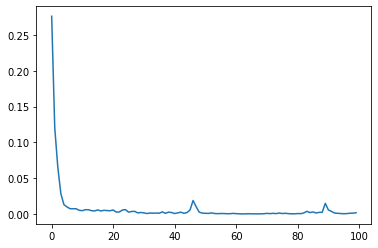

In [32]:
plt.plot(r.history['loss'], label='loss')
plt.show()

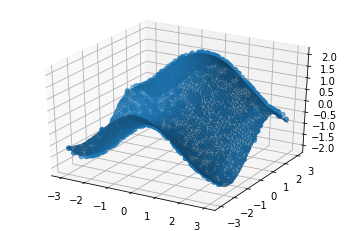

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_grid).flatten()
ax.plot_trisurf(X_grid[:,0], X_grid[:,1], y_hat, linewidth=2.0, antialiased=True)
plt.show()

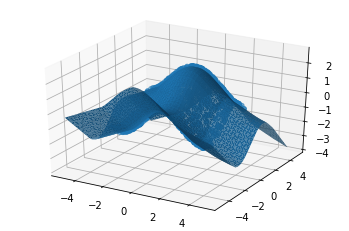

In [57]:
#Can it extrapolate

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_grid).flatten()
ax.plot_trisurf(X_grid[:,0], X_grid[:,1], y_hat, linewidth=2.0, antialiased=True)
plt.show()